# Using Food.com tokenized data

Following code extracts top ingredients in descending order of their counts, as present in the Food.com dataset

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import pickle
import sys
import types
from collections import Counter

from src import logger

import pandas.core.indexes.base
sys.modules['pandas.core.indexes.numeric'] = pandas.core.indexes.base
setattr(pandas.core.indexes.base, 'Int64Index', pd.Index)



# Data Ingestion

In [15]:
# Food.com data ingestion 
import gdown
import zipfile

dataset_url = "https://drive.google.com/file/d/1M5c0pXG9onlrm0z0IlgAoFyz8C58kkFo/view?usp=sharing"
zip_download_dir = 'Data/Food.zip'
os.makedirs('../Data', exist_ok=True)
logger.info(f"Downloading data from {dataset_url} into file {zip_download_dir}")
file_id = dataset_url.split("/")[-2]
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id,zip_download_dir)

''' Extracts data from zip file '''
unzip_path = 'Data/Food'
os.makedirs(unzip_path, exist_ok=True)
with zipfile.ZipFile(zip_download_dir, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)
logger.info(f'Successfully extracted zip file to {unzip_path}')



[2025-08-17 12:58:51,929: INFO: 1020500885]: Downloading data from https://drive.google.com/file/d/1M5c0pXG9onlrm0z0IlgAoFyz8C58kkFo/view?usp=sharing into file Data/Food.zip


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1M5c0pXG9onlrm0z0IlgAoFyz8C58kkFo
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1M5c0pXG9onlrm0z0IlgAoFyz8C58kkFo&confirm=t&uuid=594856fe-e977-4634-8ce1-0ffe968a2a7f
To: /Users/riyosha/UW_MSDS/projects/cookerooni/Data/Food.zip
100%|██████████| 280M/280M [00:02<00:00, 113MB/s]  


[2025-08-17 12:59:00,288: INFO: 1020500885]: Successfully extracted zip file to Data/Food


In [ ]:
with open("../Data/Food/ingr_map.pkl", "rb") as f:
    ingr_map = pickle.load(f, encoding="latin1")
top_ingredients = ingr_map[['replaced', 'count']].drop_duplicates(subset='replaced').sort_values(by='count', ascending=False)
top_ingredients.to_csv("../Data/Food/top_ingredients.csv", index=False)

# Food.com dataset EDA

In [5]:
import matplotlib.pyplot as plt

In [4]:
food = pd.read_csv("Data/Food/RAW_recipes.csv")

int64
2147483647
0


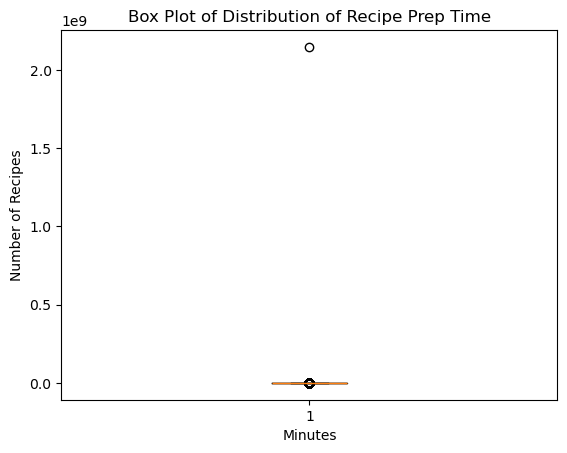

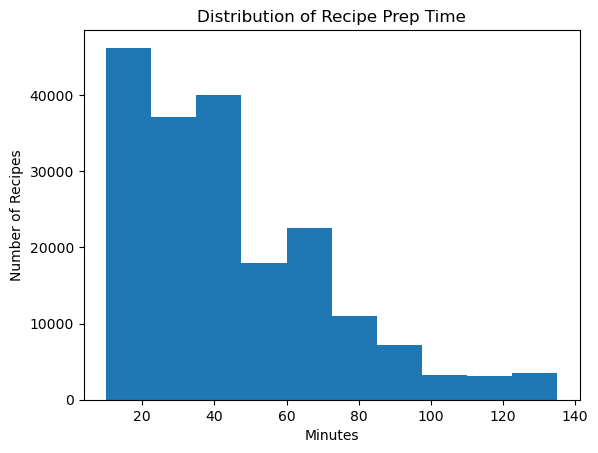

In [ ]:
# prep time distribution

print(food['minutes'].dtype)
print(max(food['minutes']))
print(min(food['minutes']))

plt.boxplot(food['minutes'])
plt.xlabel('Minutes')
plt.ylabel('Number of Recipes')
plt.title('Box Plot of Distribution of Recipe Prep Time')
plt.show()

low = food['minutes'].quantile(0.10)
high = food['minutes'].quantile(0.90)
filtered = food[(food['minutes'] >= low) & (food['minutes'] <= high)]

plt.hist(filtered['minutes'], bins=10)
plt.xlabel('Minutes')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Recipe Prep Time')
plt.show()

int64
43
1


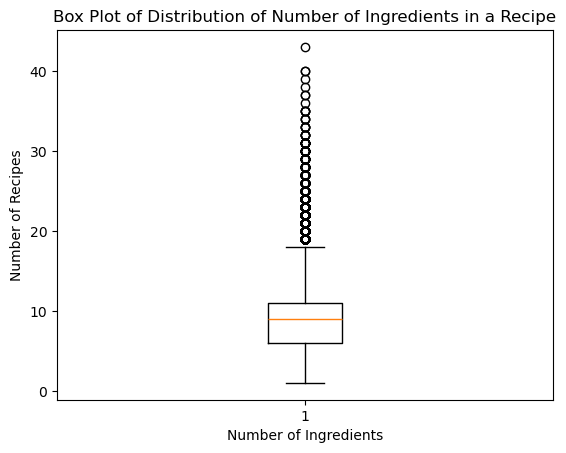

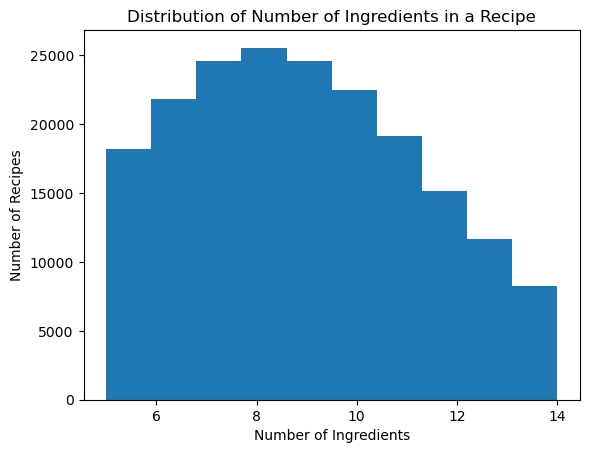

In [43]:
print(food['n_ingredients'].dtype)
print(max(food['n_ingredients']))
print(min(food['n_ingredients']))

plt.boxplot(food['n_ingredients'])
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.title('Box Plot of Distribution of Number of Ingredients in a Recipe')
plt.show()

low = food['n_ingredients'].quantile(0.10)
high = food['n_ingredients'].quantile(0.90)
filtered = food[(food['n_ingredients'] >= low) & (food['n_ingredients'] <= high)]

plt.hist(filtered['n_ingredients'], bins=10)
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Number of Ingredients in a Recipe')
plt.show()

In [83]:
food['tags'].unique()


array(["['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",
       "['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",
       ...,
       "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'appetizers', 'eggs-dairy', 'easy', 'finger-food', 'eggs', 'presentation', 'served-cold', '3-steps-or-less']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-large-g

In [18]:
food['tags'].unique()

array(["['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",
       "['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",
       ...,
       "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'appetizers', 'eggs-dairy', 'easy', 'finger-food', 'eggs', 'presentation', 'served-cold', '3-steps-or-less']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-large-g

Counter({'preparation': 230546, 'time-to-make': 225326, 'course': 218148, 'main-ingredient': 170446, 'dietary': 165091, 'easy': 126062, 'occasion': 114145, 'cuisine': 91165, 'low-in-something': 85776, 'main-dish': 71786, 'equipment': 70436, '60-minutes-or-less': 69990, 'number-of-servings': 58949, 'meat': 56042, '30-minutes-or-less': 55077, 'vegetables': 53814, 'taste-mood': 52143, '4-hours-or-less': 49497, 'north-american': 48479, '3-steps-or-less': 44933, '15-minutes-or-less': 43934, 'low-sodium': 43349, 'desserts': 43203, 'low-carb': 42189, 'healthy': 40340, 'dinner-party': 37561, 'low-cholesterol': 36743, 'low-calorie': 36429, 'vegetarian': 35651, 'beginner-cook': 35561, '5-ingredients-or-less': 35466, 'holiday-event': 34920, 'inexpensive': 32619, 'low-protein': 32522, 'low-saturated-fat': 31378, 'fruit': 31324, 'oven': 31180, 'american': 31179, 'eggs-dairy': 30142, 'pasta-rice-and-grains': 27084, 'kid-friendly': 27074, 'side-dishes': 26902, 'healthy-2': 26619, 'comfort-food': 2613

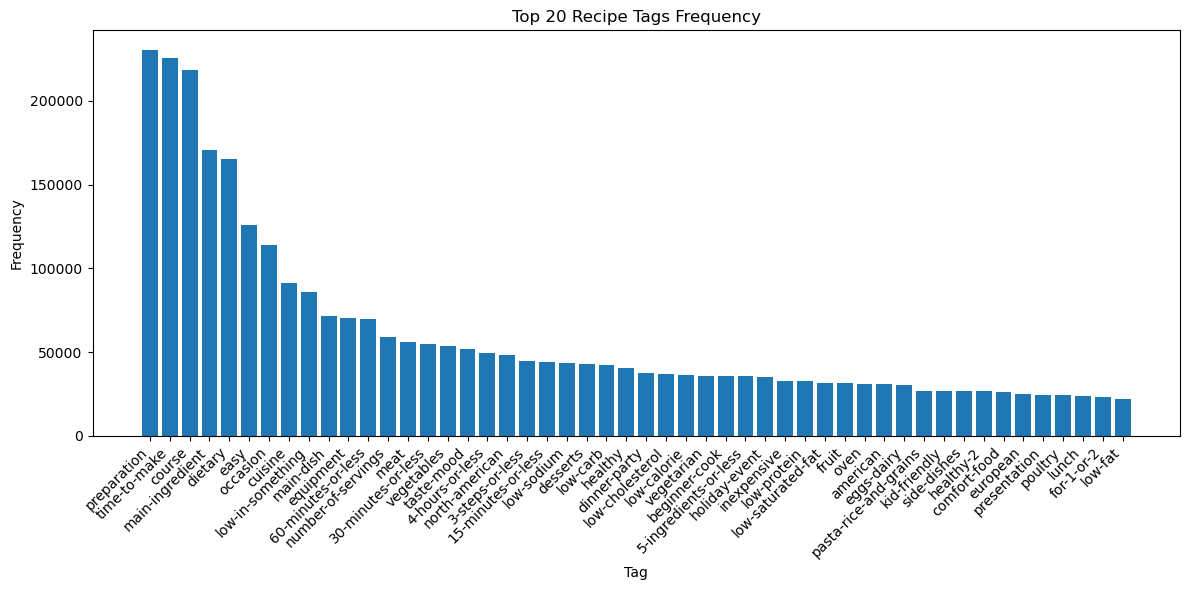

In [20]:

import ast

all_tags = [tag for tags_list in food['tags'] for tag in ast.literal_eval(tags_list)]

tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(50)
print(tag_counts)
tags, counts = zip(*top_tags)

# Plot
plt.figure(figsize=(12,6))
plt.bar(tags, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.title('Top 20 Recipe Tags Frequency')
plt.tight_layout()
plt.show()

# Food.com Dataset Vector DB using FAISS

The code below creates a vector DB with FAISS from all the ingredients mentioned in a dish's recipe.

In [54]:
import pandas as pd, numpy as np, ast, faiss
from sentence_transformers import SentenceTransformer

In [52]:
food = pd.read_csv("Data/Food/RAW_recipes.csv")


In [57]:
def combine_text(row):
    ingredients = " ; ".join(eval(row['ingredients'])) if pd.notna(row['ingredients']) else ""
    steps = " ".join(eval(row['steps'])) if pd.notna(row['steps']) else ""
    return ingredients + " " + steps

food['recipe_text'] = food.apply(combine_text, axis=1)

In [44]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the recipe texts
embeddings = model.encode(
    food['recipe_text'].head(50000).tolist(),
    batch_size=64,
    show_progress_bar=True,
    convert_to_numpy=True
)

# Convert embeddings to float32 for FAISS compatibility
embeddings = np.array(embeddings, dtype='float32')

dimension = embeddings.shape[1]  
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

print(f"FAISS index built with {index.ntotal} recipes.")

id_map = {i: {
    "name": food.iloc[i]['name'],
    "ingredients": food.iloc[i]['ingredients'],
    "steps": food.iloc[i]['steps'],
    "minutes": food.iloc[i]['minutes'],
    "nutrition": food.iloc[i]['nutrition'],
    "link": food.iloc[i].get('link', None) 
} for i in range(len(food))}

Batches: 100%|██████████| 782/782 [09:14<00:00,  1.41it/s]


FAISS index built with 50000 recipes.


In [46]:

def retrieve_recipes(user_ingredients, top_k=5):
    query_emb = model.encode([user_ingredients], convert_to_numpy=True).astype("float32")
    distances, indices = index.search(query_emb, top_k)

    retrieved = []
    for idx in indices[0]:
        recipe = id_map[idx]
        retrieved.append(recipe)
    return retrieved

# User query
user_ingredients = "tomatoes, onions, garlic, bread, cheese"
top_recipes = retrieve_recipes(user_ingredients)


In [47]:
top_recipes

[{'name': 'basically the best bruschetta ever',
  'ingredients': "['plum tomatoes', 'vidalia onion', 'elephant garlic', 'chives', 'extra virgin olive oil', 'balsamic vinegar', 'basil', 'oregano', 'black pepper']",
  'steps': "['combine all ingredients above and refrigerate for several hours , check for taste and season accordingly', 'serve on garlic bread with some parm cheese or bake on the bread with a little feta or assagio cheese for a change of pace', 'enjoy']",
  'minutes': 150,
  'nutrition': '[51.3, 4.0, 15.0, 0.0, 1.0, 2.0, 1.0]',
  'link': None},
 {'name': 'avocado and sprout sandwiches',
  'ingredients': "['bread', 'avocado', 'tomatoes', 'cheese', 'sunflower sprouts', 'red onion']",
  'steps': "['layer the ingredients on one slice of bread , top with the other slice , cut and eat']",
  'minutes': 10,
  'nutrition': '[509.0, 45.0, 8.0, 56.0, 52.0, 89.0, 11.0]',
  'link': None},
 {'name': 'bruschetta',
  'ingredients': "['tomatoes', 'red onion', 'garlic cloves', 'fresh parsley

In [ ]:
def safe_list(x):
    try: 
        return ast.literal_eval(x) if isinstance(x, str) else (x or [])
    except Exception:
        return []

# Prepare text for embeddings (name + ingredients + steps + optional description/tags)
for col in ["ingredients", "steps", "tags"]:
    food[col] = food[col].apply(safe_list)

food["recipe_text"] = (
    food.get("name", "").astype(str) + " | "
    + food["ingredients"].apply(lambda xs: " ; ".join(xs)) + " | "
    + food["steps"].apply(lambda xs: " ".join(xs)) + " | "
    + (food["tags"].apply(lambda xs: " ".join(xs)) if "tags" in food.columns else "")
)

# Embed with a free, small model
model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(
    food["recipe_text"].head(50000).tolist(),
    batch_size=64,
    convert_to_numpy=True,
    show_progress_bar=True
).astype("float32")

# FAISS index (L2)
index = faiss.IndexFlatL2(emb.shape[1])
index.add(emb)

# Keep metadata for RAG
meta = pd.DataFrame({
    "idx": np.arange(len(food)),
    "name": food["name"],
    "minutes": food["minutes"],
    "ingredients": food["ingredients"],
    "steps": food["steps"],
    "nutrition": food["nutrition"], 
})


[2025-08-17 13:07:20,008: INFO: SentenceTransformer]: Use pytorch device_name: mps
[2025-08-17 13:07:20,009: INFO: SentenceTransformer]: Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches: 100%|██████████| 782/782 [12:32<00:00,  1.04it/s]


In [ ]:
# persist on disk
faiss.write_index(index, "Data/recipes.faiss")
#meta.to_parquet("Data/recipes_meta.parquet")


In [22]:
def ingredient_set(xs):
    return set([x.lower().strip() for x in xs])

def parse_minutes(x):
    try: return int(x)
    except: return 10**9

def retrieve(user_ings, max_minutes=None, k=50, top_k_return=20):
    """
    1) semantic retrieve with FAISS
    2) re-rank by (fewest extra ingredients, most overlap), then time
    """
    query_txt = ", ".join(user_ings)
    q = model.encode([query_txt], convert_to_numpy=True).astype("float32")
    D, I = index.search(q, k)
    user_set = set([i.lower().strip() for i in user_ings])

    candidates = []
    for idx in I[0]:
        row = meta.iloc[idx]
        rec_set = ingredient_set(row.ingredients)
        overlap = len(rec_set & user_set)
        extras  = len(rec_set - user_set)
        mins    = parse_minutes(row.minutes)
        if max_minutes is not None and mins > max_minutes:
            continue
        # score: more overlap better, fewer extras better, shorter time better
        score = (overlap, -extras, -mins)
        candidates.append((score, idx))

    candidates.sort(reverse=True)  # because overlap positive, extras negative, mins negative
    best = [c[1] for c in candidates[:top_k_return]]
    return meta.loc[best].reset_index(drop=True)


In [23]:
user_ingredients = ["chicken", "butter", "garlic"]
retrieved = retrieve(user_ingredients, max_minutes=15, k=80, top_k_return=6)


Batches: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


In [24]:
retrieved

,idx,name,minutes,ingredients,steps,nutrition
0,5965,anytime garlic butter,5,"[butter, olive oil, garlic, dried basil, dried...","[in a small bowl melt butter in microwave, usi...","[1950.5, 336.0, 0.0, 45.0, 4.0, 455.0, 1.0]"
1,22499,best ever garlic butter,5,"[butter, garlic, parmesan cheese, mayonnaise, ...","[in the food processor , add the garlic and mi...","[2482.2, 325.0, 30.0, 184.0, 66.0, 616.0, 44.0]"
2,47885,chili garlic butter,3,"[butter, garlic clove, sambal oelek]",[combine ingredients in a small bowl and micro...,"[208.1, 35.0, 0.0, 8.0, 0.0, 72.0, 0.0]"
3,18680,basil garlic butter,15,"[unsalted butter, basil, garlic, parmesan cheese]","[place the butter in a mixing bowl, add basil ...","[3334.6, 573.0, 2.0, 11.0, 21.0, 1179.0, 1.0]"
4,11582,awesome garlic chicken sandwich,10,"[chicken breasts, buns, garlic powder, butter,...","[heat the oven to broil, cut the crusty buns i...","[339.8, 38.0, 11.0, 17.0, 10.0, 75.0, 8.0]"
5,29736,broccoli garlic stir fry,15,"[sesame oil, fresh broccoli, soy sauce, green ...","[in a bowl combine together the soy sauce , gr...","[156.3, 11.0, 37.0, 44.0, 11.0, 5.0, 6.0]"


In [45]:
SYSTEM_PROMPT = """You are Cookerooni, a careful, practical recipe assistant.
You ALWAYS base your answers on the provided recipe context and user ingredients.
You must obey all constraints and keep output JSON strictly valid (no comments or prose)."""

def build_prompt(user_ings, max_minutes, retrieved_rows, extras_allowed=2):
    ctx = context_block(retrieved_rows)
    ing_list = ", ".join(user_ings)
    mins_txt = f"{max_minutes} minutes" if max_minutes else "the requested time"

    return f"""
You will synthesize ONE recipe using the CONTEXT below.

CONSTRAINTS:
- Use only the user ingredients when possible: {ing_list}
- You may introduce at most {extras_allowed} common pantry items (e.g., salt, pepper, oil).
- Total time must be <= {mins_txt}.
- Make steps concise and numbered.
- Include a clear title and estimated total_minutes.
- Include a nutrition section; if exact numbers aren't in context, estimate reasonably and mark estimates as 'approx'.

CONTEXT:
{ctx}

RESPONSE FORMAT (valid JSON, no extra text):
{{
  "title": "...",
  "total_minutes": <int>,
  "ingredients": ["..."],
  "steps": ["1) ...", "2) ...", "..."],
  "notes": "substitutions or tips",
  "nutrition": {{"calories": <int>, "protein_g": <int>, "fat_g": <int>, "carbs_g": <int>, "source": "context|approx"}}
}}
""".strip()


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv(".env")

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
import google.generativeai as genai
genai.configure(api_key=GEMINI_API_KEY)

def generate_recipe_gemini(user_ings, max_minutes, retrieved_rows):
    prompt = build_prompt(user_ings, max_minutes, retrieved_rows)
    model = genai.GenerativeModel("gemini-2.0-flash")
    response = model.generate_content(f"{SYSTEM_PROMPT}\n{prompt}", generation_config={
        "temperature": 0.2,
        "max_output_tokens": 700,
    })
    return response.text


In [ ]:
retrieved = retrieve(user_ingredients, max_minutes=15, k=80, top_k_return=6)
recipe_json = generate_recipe_gemini(user_ingredients, 15, retrieved)
print(recipe_json)   


Batches: 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


```json
{
  "title": "Garlic Butter Chicken Bites",
  "total_minutes": 12,
  "ingredients": [
    "chicken",
    "butter",
    "garlic",
    "salt",
    "pepper"
  ],
  "steps": [
    "1) Cut chicken into bite-sized pieces.",
    "2) Melt butter in a pan over medium heat.",
    "3) Add minced garlic to the melted butter and cook for 1 minute until fragrant.",
    "4) Add chicken to the pan and cook until browned and cooked through (about 8-10 minutes).",
    "5) Season with salt and pepper to taste."
  ],
  "notes": "Serve immediately. Can be served as an appetizer or main course.",
  "nutrition": {
    "calories": 250,
    "protein_g": 30,
    "fat_g": 14,
    "carbs_g": 2,
    "source": "approx"
  }
}
```


# Food.com dataset RAG with Langchain

The following code integrates a FAISS vector DB with Langchain for recipe generation.

In [22]:
food = pd.read_csv("Data/Food/RAW_recipes.csv")

In [23]:
def combine_text(row):
    ingredients = " ; ".join(eval(row['ingredients'])) if pd.notna(row['ingredients']) else ""
    steps = " ".join(eval(row['steps'])) if pd.notna(row['steps']) else ""
    tags = "; ".join(eval(row['tags'])) if pd.notna(row['tags']) else ""
    return ingredients + " " + steps + " " + tags

food['recipe_text'] = food.apply(combine_text, axis=1)

## Create Vector DB with Chroma

In [ ]:
import langchain
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

persist_directory = "Data/recipes_chroma_db"

vector_db = Chroma.from_texts(
    texts=food['recipe_text'].head(5000).tolist(),
    embedding=embedding_model,
    metadatas=food[['name', 'ingredients', 'steps', 'minutes', 'tags']].head(5000).to_dict(orient='records'),
    persist_directory=persist_directory
)

vector_db.persist()




[2025-08-17 20:27:22,913: INFO: SentenceTransformer]: Use pytorch device_name: mps
[2025-08-17 20:27:22,914: INFO: SentenceTransformer]: Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


In [32]:
def context_block(rows):
    blocks = []
    for _, r in rows.iterrows():
        blocks.append(
            f"TITLE: {r['name']}\n"
            f"MINUTES: {r['minutes']}\n"
            f"INGREDIENTS: {', '.join(r['ingredients'])}\n"
            f"STEPS: {' '.join(r['steps'])[:1500]}...\n"
            f"NUTRITION_RAW: {r['nutrition']}"
        )
    return "\n\n".join(blocks)

In [34]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate

from dotenv import load_dotenv
import os

load_dotenv(".env")

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
import google.generativeai as genai
genai.configure(api_key=GEMINI_API_KEY)

SYSTEM_PROMPT = """You are Cookeroni, a careful, practical recipe assistant.
You ALWAYS base your answers on the provided recipe context and user ingredients.
You must obey all constraints and keep output JSON strictly valid (no comments or prose)."""

prompt_template = PromptTemplate(
    input_variables=["context", "user_ingredients", "max_minutes"],
    template="""
You will synthesize ONE recipe using the CONTEXT below.

CONSTRAINTS:
- Use only the user ingredients when possible: {user_ingredients}
- Total time must be <= {max_minutes} minutes
- Include title, ingredients, steps, nutrition info

CONTEXT:
{context}

RESPONSE FORMAT (valid JSON):
{{
  "title": "...",
  "total_minutes": <int>,
  "ingredients": ["..."],
  "steps": ["1) ...", "2) ...", "..."],
  "nutrition": {{"calories": <int>, "protein_g": <int>, "fat_g": <int>, "carbs_g": <int>, "source": "context|approx"}}
}}
"""
)

# Initialize Gemini LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  
    temperature=0.2,
    google_api_key=GEMINI_API_KEY,
    max_output_tokens=700
)

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vector_db.as_retriever(search_kwargs={"k":5}),
    chain_type="stuff",
    chain_type_kwargs={"prompt": prompt_template}
)

In [38]:
def generate_recipe(user_ingredients, max_minutes, k=20):
    # Step 1: Retrieve top recipes
    retrieved_docs = vector_db.similarity_search(user_ingredients, k=k)
    context_str = "\n\n".join([doc.page_content for doc in retrieved_docs])
    
    # Step 2: Run LLM chain
    from langchain.chains import LLMChain
    recipe_chain = LLMChain(
        llm=llm,
        prompt=prompt_template
    )
    
    response = recipe_chain.run({
        "context": context_str,
        "user_ingredients": user_ingredients,
        "max_minutes": max_minutes
    })
    
    return response


In [39]:
user_ingredients = "chicken, butter, garlic"
max_minutes = 15

recipe_json = generate_recipe(user_ingredients, max_minutes)
print(recipe_json)


```json
{
  "title": "Garlic Butter Chicken Bites",
  "total_minutes": 10,
  "ingredients": [
    "Boneless, skinless chicken breasts",
    "2 tablespoons butter",
    "2 cloves garlic, minced",
    "Salt and pepper to taste"
  ],
  "steps": [
    "1) Slice chicken breasts into 1-inch cubes.",
    "2) Melt butter in a skillet over medium-high heat.",
    "3) Add chicken and garlic to the skillet.",
    "4) Saute until chicken is cooked through and lightly browned, about 5-7 minutes.",
    "5) Season with salt and pepper to taste.",
    "6) Serve immediately."
  ],
  "nutrition": {
    "calories": 250,
    "protein_g": 35,
    "fat_g": 10,
    "carbs_g": 2,
    "source": "approx"
  }
}
```
